In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

> W ramach praktyki oraz pokazania różnic pomiędzy wykresami generowanymi bezpośrednio poprzez funkcje pandas vs. matplotlib vs. seaborn wykorzystamy na początek przedstawiony jeż wcześniej dataset zamówienia.

## 1. Analiza i przygotowanie zbioru danych zamówienia.csv

In [187]:
df_zamowienia = pd.read_csv('./data/zamowienia.csv', sep=';')
df_zamowienia.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
0,Polska,Kowalski,2003-07-16,10248,440.00
1,Polska,Sowiński,2003-07-10,10249,1863.40
2,Niemcy,Peacock,2003-07-12,10250,1552.60
3,Niemcy,Leverling,2003-07-15,10251,654.06
4,Niemcy,Peacock,2003-07-11,10252,3597.90


In [188]:
df_zamowienia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kraj             799 non-null    object 
 1   Sprzedawca       799 non-null    object 
 2   Data zamowienia  799 non-null    object 
 3   idZamowienia     799 non-null    int64  
 4   Utarg            799 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 31.3+ KB


In [189]:
df_zamowienia.describe()

,idZamowienia,Utarg
count,799.000000,799.000000
mean,10647.175219,1537.330914
std,231.091915,1860.590758
min,10248.000000,12.500000
25%,10447.500000,467.075000
50%,10647.000000,956.670000
75%,10846.500000,1891.375000
max,11057.000000,16387.500000


Z informacji powyżej wynika, że pandas nie wykonał automatycznej konwersji wartości w kolumnie `Data zamowienia` na typ datetime. Należy to zrobić ręcznie.

In [190]:
df_zamowienia['Data zamowienia'] = pd.to_datetime(df_zamowienia['Data zamowienia'])
df_zamowienia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Kraj             799 non-null    object        
 1   Sprzedawca       799 non-null    object        
 2   Data zamowienia  799 non-null    datetime64[ns]
 3   idZamowienia     799 non-null    int64         
 4   Utarg            799 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 31.3+ KB


In [191]:
df_zamowienia.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
0,Polska,Kowalski,2003-07-16,10248,440.00
1,Polska,Sowiński,2003-07-10,10249,1863.40
2,Niemcy,Peacock,2003-07-12,10250,1552.60
3,Niemcy,Leverling,2003-07-15,10251,654.06
4,Niemcy,Peacock,2003-07-11,10252,3597.90


Jeżeli format daty nie został automatycznie rozpoznany lub chcemy go zmienić (np. pozbyć się czasu a zostawić tylko samą datę), należy jawnie określić format konwersji.

In [192]:
# zamieniamy typ w kolumnie na str (wyświetlany jako object w pandasie)
df_zamowienia['Data zamowienia'] = df_zamowienia['Data zamowienia'].astype(str)
df_zamowienia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kraj             799 non-null    object 
 1   Sprzedawca       799 non-null    object 
 2   Data zamowienia  799 non-null    object 
 3   idZamowienia     799 non-null    int64  
 4   Utarg            799 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 31.3+ KB


In [193]:
pd.to_datetime(df_zamowienia['Data zamowienia'], format='%Y-%m-%d')
# pamiętajmy, że powyższa operacja zwróci nam pandas series po konwersji, więc jeżeli chcemy zamienić kolumnę nowymi wartościami, trzeba ją nadpisać.
df_zamowienia['Data zamowienia'] = pd.to_datetime(df_zamowienia['Data zamowienia'], format='%Y-%m-%d')

In [194]:
df_zamowienia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Kraj             799 non-null    object        
 1   Sprzedawca       799 non-null    object        
 2   Data zamowienia  799 non-null    datetime64[ns]
 3   idZamowienia     799 non-null    int64         
 4   Utarg            799 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 31.3+ KB


Istnieje też możliwość uruchomienia funkcji `to_datetime` na całej ramce danych, ale muszą istnieć w niej co najmniej kolumny ze składowymi daty i to o odpowiednich nazwach.

In [195]:
# najpierw rozdzielimy kolumnę z datą na poszczególne kolumny
# jeżeli jest to już kolumna typu datetime to można to zrobić korzystając z możliwości obiektu typu datetime
df_zamowienia['year'] = df_zamowienia['Data zamowienia'].dt.year
df_zamowienia['month'] = df_zamowienia['Data zamowienia'].dt.month
df_zamowienia['day'] = df_zamowienia['Data zamowienia'].dt.day
df_zamowienia.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg,year,month,day
0,Polska,Kowalski,2003-07-16,10248,440.00,2003,7,16
1,Polska,Sowiński,2003-07-10,10249,1863.40,2003,7,10
2,Niemcy,Peacock,2003-07-12,10250,1552.60,2003,7,12
3,Niemcy,Leverling,2003-07-15,10251,654.06,2003,7,15
4,Niemcy,Peacock,2003-07-11,10252,3597.90,2003,7,11


In [196]:
pd.to_datetime(df_zamowienia[['year', 'month', 'day']])

0     2003-07-16
1     2003-07-10
2     2003-07-12
3     2003-07-15
4     2003-07-11
         ...    
794   2005-04-30
795   2005-05-01
796   2005-04-29
797   2005-05-01
798   2005-05-01
Length: 799, dtype: datetime64[ns]

Jeżeli jednak kolumna jest typu `str` a my chcielibyśmy na jej podstawie stworzyć nową kolumnę przekształcając całość lub fragment danych z kolumny bazowej to jest na to wiele możliwości.

In [197]:
# przywracamy ramkę do jej pierwotnej postaci
# datetime na powrót do typu str
df_zamowienia['Data zamowienia'] = df_zamowienia['Data zamowienia'].astype(str)
# usuwamy zbędne kolumny
df_zamowienia.drop(columns=['year', 'month', 'day'], inplace=True)
df_zamowienia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kraj             799 non-null    object 
 1   Sprzedawca       799 non-null    object 
 2   Data zamowienia  799 non-null    object 
 3   idZamowienia     799 non-null    int64  
 4   Utarg            799 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 31.3+ KB


In [198]:
# na potrzeby przykładów zostanie użytych kilka kopii bazowego zbioru danych
# warto wiedzieć, że możemy wykonać kopię płytką (domyślnie) lub głęboką (deep=True)
df_zamowienia_copy_1 = df_zamowienia.copy(deep=True)
# stworzymy nową kolumnę, która będzie zawierała rok z kolumny Data zamowienia
# w tym przykładzie uzyskamy to pobierając cztery pierwsze znaki z każdego wiersza tej kolumny
df_zamowienia_copy_1['rok'] = df_zamowienia_copy_1['Data zamowienia'].str[:4]
df_zamowienia_copy_1.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg,rok
0,Polska,Kowalski,2003-07-16,10248,440.00,2003
1,Polska,Sowiński,2003-07-10,10249,1863.40,2003
2,Niemcy,Peacock,2003-07-12,10250,1552.60,2003
3,Niemcy,Leverling,2003-07-15,10251,654.06,2003
4,Niemcy,Peacock,2003-07-11,10252,3597.90,2003


In [199]:
# w ten sposób możemy używać dowolnych metod dla obiektu typu str
df_zamowienia_copy_1['Nowa data'] = df_zamowienia_copy_1['Data zamowienia'].str.replace('-','/')
df_zamowienia_copy_1.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg,rok,Nowa data
0,Polska,Kowalski,2003-07-16,10248,440.00,2003,2003/07/16
1,Polska,Sowiński,2003-07-10,10249,1863.40,2003,2003/07/10
2,Niemcy,Peacock,2003-07-12,10250,1552.60,2003,2003/07/12
3,Niemcy,Leverling,2003-07-15,10251,654.06,2003,2003/07/15
4,Niemcy,Peacock,2003-07-11,10252,3597.90,2003,2003/07/11


Taki sam efekt możemy również osiągnąć poprzez zastosowanie metody [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html).

In [200]:
df_zamowienia_copy_1['Jeszcze nowsza data'] = df_zamowienia_copy_1['Data zamowienia'].apply(str.replace, args=('-','/'))
df_zamowienia_copy_1.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg,rok,Nowa data,Jeszcze nowsza data
0,Polska,Kowalski,2003-07-16,10248,440.00,2003,2003/07/16,2003/07/16
1,Polska,Sowiński,2003-07-10,10249,1863.40,2003,2003/07/10,2003/07/10
2,Niemcy,Peacock,2003-07-12,10250,1552.60,2003,2003/07/12,2003/07/12
3,Niemcy,Leverling,2003-07-15,10251,654.06,2003,2003/07/15,2003/07/15
4,Niemcy,Peacock,2003-07-11,10252,3597.90,2003,2003/07/11,2003/07/11


In [313]:
# możliwe jest również użycie funkcji anonimowej (lambda) poprzez apply
# zmienna x przechowuje wartość z kolumny Data zamowienia dla danego wiersza
# te metody działają w trybie broadcast, czyli są "rozgłąszane" na cały wycinek ramki (Series lub DataFrame)
df_zamowienia_copy_1['Data zamowienia'].apply(lambda x: (x[:4], x[5:7], x[:-3:-1][::-1])).head()
# pytanie - Co dokładnie dzieje się w zapisie x[:-3:-1][::-1] ?

0    (2003, 07, 16)
1    (2003, 07, 10)
2    (2003, 07, 12)
3    (2003, 07, 15)
4    (2003, 07, 11)
Name: Data zamowienia, dtype: object

### 1.2 Porównanie wykresów

Dla porównania zarówno wyglądu, jak i sposobu generowania wykresów wykorzystamy kilka informacji, które chcielibyśmy uzyskać z naszych danych.
**Dokumentacja online, na którą warto rzucić okiem:**

* https://seaborn.pydata.org/introduction.html
* https://seaborn.pydata.org/tutorial/function_overview.html

**Informacja nr 1 - jak wyglądał przyrost wartości zamówień w czasie ?**

In [202]:
# krok 1 - dane należy posortować chronologicznie
df_zamowienia.sort_values(by=['Data zamowienia'])
# jeżeli chcemy nadpisać ramkę ramką posortowaną
# df_zamowienia = df_zamowienia.sort_values(by=['Data zamowienia'])
# parametr ascending pozwala na określenie kierunku sortowania, w liście możemy określić kolejne kolumny, po których chcemy sortować

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
1,Polska,Sowiński,2003-07-10,10249,1863.40
4,Niemcy,Peacock,2003-07-11,10252,3597.90
2,Niemcy,Peacock,2003-07-12,10250,1552.60
3,Niemcy,Leverling,2003-07-15,10251,654.06
7,Polska,Dudek,2003-07-15,10255,2490.50
...,...,...,...,...,...
797,Niemcy,Callahan,2005-05-01,11056,3740.00
791,Niemcy,Peacock,2005-05-01,11044,591.60
789,Niemcy,Fuller,2005-05-01,11042,405.75
793,Polska,King,2005-05-01,11047,817.87


In [203]:
# aby nadpisać ramkę możemy użyć trybu inplace oraz dodatkowo, jeżeli jest to postać docelowa to możemy zignorować indeks w operacji sortowania
df_zamowienia_copy_2 = df_zamowienia.copy(deep=True)
df_zamowienia_copy_2.sort_values(by=['Data zamowienia'], inplace=True, ignore_index=True)
df_zamowienia_copy_2.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
0,Polska,Sowiński,2003-07-10,10249,1863.40
1,Niemcy,Peacock,2003-07-11,10252,3597.90
2,Niemcy,Peacock,2003-07-12,10250,1552.60
3,Niemcy,Leverling,2003-07-15,10251,654.06
4,Polska,Dudek,2003-07-15,10255,2490.50


In [204]:
# index można jednak "zresetować" również poza operacją sortowania
# najpierw nieuporządkowana postać
df_zamowienia['Data zamowienia'] = pd.to_datetime(df_zamowienia['Data zamowienia'])
df_zamowienia.sort_values(by=['Data zamowienia'], inplace=True)
df_zamowienia.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
1,Polska,Sowiński,2003-07-10,10249,1863.40
4,Niemcy,Peacock,2003-07-11,10252,3597.90
2,Niemcy,Peacock,2003-07-12,10250,1552.60
3,Niemcy,Leverling,2003-07-15,10251,654.06
7,Polska,Dudek,2003-07-15,10255,2490.50


In [205]:
# reset indeksu
df_zamowienia.reset_index(drop=True, inplace=True)
df_zamowienia.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
0,Polska,Sowiński,2003-07-10,10249,1863.40
1,Niemcy,Peacock,2003-07-11,10252,3597.90
2,Niemcy,Peacock,2003-07-12,10250,1552.60
3,Niemcy,Leverling,2003-07-15,10251,654.06
4,Polska,Dudek,2003-07-15,10255,2490.50


In [206]:
# przyrost wartości zamówień możemy osiągnąć poprzez użycie sumy skumulowanej, więc dla wiarygodności danych niezbędne było nam posortowanie danych wg.daty
df_zamowienia['Utarg'].cumsum().head()

0     1863.40
1     5461.30
2     7013.90
3     7667.96
4    10158.46
Name: Utarg, dtype: float64

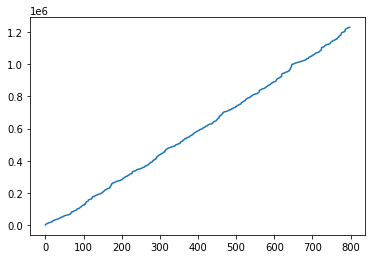

In [216]:
# możemy od razu wyświetlić te dane na wykresie
# case 1 - bezpośrednio z pandas DataFrame
# średnik na końcu powoduje, że nie jest wyświetlana wartość zwracana przez metodę plot()
df_zamowienia['Utarg'].cumsum().plot();

Nie wygląda to najlepiej i niewiele informacji z tego wykresu wynika. Powodem jest wartość, którą zwróciła poprzednia operacja a jest nią pandas Series gdzie mamy indeks w postaci indeksu kolejnej wartości sumy skumulowanej, więc nie mamy do dyspozycji kolumny z datą.

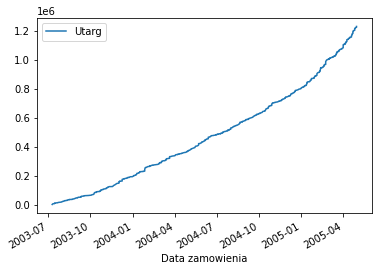

In [244]:
# możemy utworzyć pomocniczą serię danych z indeksem w postaci daty
df_zamowienia[['Data zamowienia', 'Utarg']].set_index('Data zamowienia').cumsum().plot();

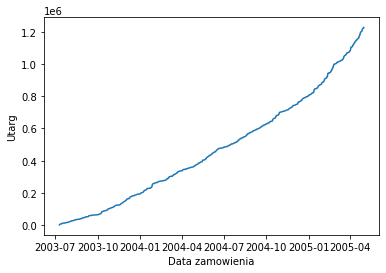

In [249]:
# użycie biblioteki seaborn
sns.lineplot(data=df_zamowienia, x='Data zamowienia', y=np.cumsum(df_zamowienia['Utarg']));

**Informacja nr 2 - Jak rozkładają się sumy zamówień dla danego sprzedawcy ?**

<AxesSubplot:xlabel='Sprzedawca'>

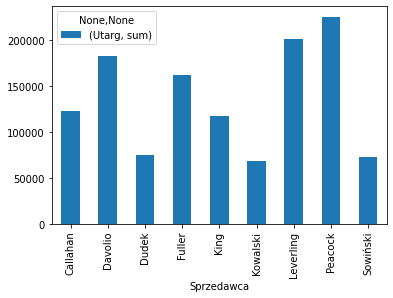

In [253]:
# grupujemy dane po kolumnie sprzedawca używając sumy jako funkcji agregacji
df_zamowienia.groupby('Sprzedawca').agg({'Utarg': ['sum']}).plot(kind="bar")

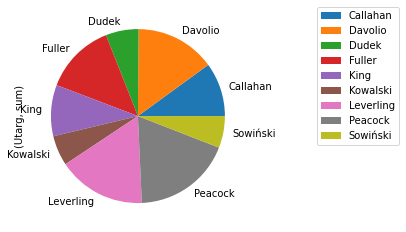

In [259]:
# struktura
df_zamowienia.groupby('Sprzedawca').agg({'Utarg': ['sum']}).plot(kind="pie", subplots=True)
# odsuwamy nieco legendę
plt.legend(bbox_to_anchor=(1.3,1.025));

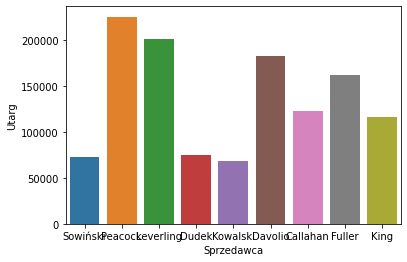

In [262]:
# wykres słupkowy z użyciem biblioteki seaborn
# nie musimy wcześniej grupować ramki poprawnie określając serie danych oraz estimator
# dokumentacja dla tego rodzaju wykresu https://seaborn.pydata.org/generated/seaborn.barplot.html
ax = sns.barplot(x='Sprzedawca', y='Utarg', data=df_zamowienia, ci=None, estimator=sum)

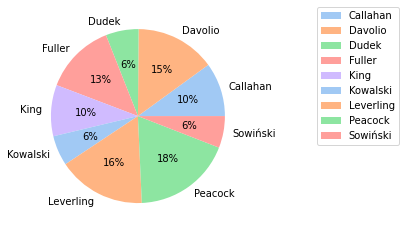

In [294]:
# ponownie seaborn z wykresem kołowym, struktura wartości zamówień
# bardziej w stylu matplotlib
colors = sns.color_palette('pastel')[0:5]
dane = df_zamowienia.groupby('Sprzedawca').agg({'Utarg': ['sum']})
# wyświetl zmienną dane i przeanalizuj postać tej ramki danych

# dla każdej przeprowadzonej agregacji (można użyć wiele jednocześnie) jest utworzona grupa
# aby dostać się do danej części należy podać etykietę w postaci krotki (kolumna, agregacja)
plt.pie(dane[('Utarg','sum')], labels=dane.index, colors = colors, autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1.3,1.025));

**Informacja 3 - jak rozkłada się struktura wartości w danej serii lub grupie ?**

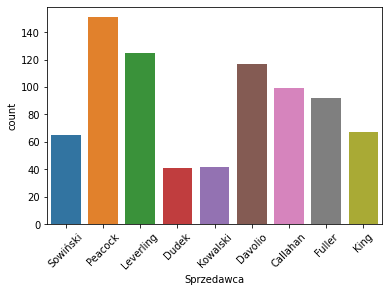

In [301]:
# przy użyciu seaborn możemy dość szybko wyświetlić na wykresie liczebność wartości w poszczególnej serii danych
# możemy je wcześniej odfiltrować, ale nie jest to konieczne

dane = df_zamowienia[['Sprzedawca','idZamowienia']].set_index('idZamowienia')
# rotacja etykiet na osi x
plt.xticks(rotation=45)
ax = sns.countplot(x="Sprzedawca", data=dane)

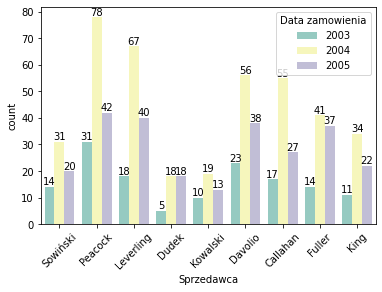

In [312]:
# mozemy również użyć podwójnego grupowania w sposób dynamiczny, tzn. bez wcześniejszego przygotowywania ramki danych
# a deklarując tę opcję w parametrach wykresu
# rotacja etykiet na osi x
plt.xticks(rotation=45)
ax = sns.countplot(x="Sprzedawca", hue=df_zamowienia['Data zamowienia'].dt.year, data=df_zamowienia, palette="Set3")
# dodamy również etykiety wartości
for container in ax.containers:
    ax.bar_label(container);

**Kilka dodatkowych przykładów z grupowaniem?**

In [318]:
# grupowanie wartości utargu dla kilku funkcji agregacji jednocześnie
dane = df_zamowienia.groupby('Sprzedawca').agg({'Utarg': ['sum', 'mean', 'count']})
dane

Utarg                   
                  sum         mean count
Sprzedawca                              
Callahan    123032.67  1242.754242    99
Davolio     182500.09  1559.829829   117
Dudek        75048.04  1830.440000    41
Fuller      162503.78  1766.345435    92
King        116962.99  1745.716269    67
Kowalski     68792.25  1637.910714    42
Leverling   201196.27  1609.570160   125
Peacock     225763.68  1495.123709   151
Sowiński     72527.63  1115.809692    65

In [319]:
# aby dostać się do grupy musimy podać kolumnę i nazwę funkcji agregującej
dane[('Utarg','sum')]

Sprzedawca
Callahan     123032.67
Davolio      182500.09
Dudek         75048.04
Fuller       162503.78
King         116962.99
Kowalski      68792.25
Leverling    201196.27
Peacock      225763.68
Sowiński      72527.63
Name: (Utarg, sum), dtype: float64

In [327]:
# lub tak (dostęp do kolumn również w taki sposób, ale nazwy muszą być bez spacji)
dane.Utarg['sum']

Sprzedawca
Callahan     123032.67
Davolio      182500.09
Dudek         75048.04
Fuller       162503.78
King         116962.99
Kowalski      68792.25
Leverling    201196.27
Peacock      225763.68
Sowiński      72527.63
Name: sum, dtype: float64

In [332]:
# dla przypomnienia - mamy dwie główne metodu dostępu do wybranych fragementów ramki,
# loc[wiersze, kolumny] - podajemy wartość w kolumnie indeksu oraz nazwe kolumny
# iloc[wiersze, kolumny] - podajemy indeksy wierszy i kolumn
dane.loc['Dudek', ('Utarg', 'sum')]

75048.04

In [333]:
dane.loc[:, ('Utarg', 'count')]

Sprzedawca
Callahan      99
Davolio      117
Dudek         41
Fuller        92
King          67
Kowalski      42
Leverling    125
Peacock      151
Sowiński      65
Name: (Utarg, count), dtype: int64

In [335]:
dane.iloc[0:5, ::-1]

Utarg                        
           count         mean        sum
Sprzedawca                              
Callahan      99  1242.754242  123032.67
Davolio      117  1559.829829  182500.09
Dudek         41  1830.440000   75048.04
Fuller        92  1766.345435  162503.78
King          67  1745.716269  116962.99

In [341]:
# możemy również używać wycinków (ang. slice) tak jak do tej pory na listach, tablicach numpy itp
dane[:4], dane[::2]

(                Utarg                   
                   sum         mean count
 Sprzedawca                              
 Callahan    123032.67  1242.754242    99
 Davolio     182500.09  1559.829829   117
 Dudek        75048.04  1830.440000    41
 Fuller      162503.78  1766.345435    92,
                 Utarg                   
                   sum         mean count
 Sprzedawca                              
 Callahan    123032.67  1242.754242    99
 Dudek        75048.04  1830.440000    41
 King        116962.99  1745.716269    67
 Leverling   201196.27  1609.570160   125
 Sowiński     72527.63  1115.809692    65)

In [342]:
# chcemy zwrócić nazwisko sprzedawcy, który uzyskał największą sumę przychodów
# to nie do końca to czego chcemy, ale samą wartość już mamy
dane[('Utarg','sum')].max()

225763.68

In [346]:
# możemy tak, poprzez założenie filtra na danej serii danych
dane[('Utarg', 'sum')][dane[('Utarg', 'sum')] == dane[('Utarg', 'sum')].max()]

Sprzedawca
Peacock    225763.68
Name: (Utarg, sum), dtype: float64

In [348]:
# ale można znaleźć indeks, do którego przypisana jest wartość maksymalna w danej kolumnie
dane[('Utarg', 'sum')].idxmax()

'Peacock'

In [355]:
# teraz można użyć tego, co zostało zwrócone do pobrania całego wiersz
dane.loc[dane[('Utarg', 'sum')].idxmax()]

Utarg  sum      225763.680000
       mean       1495.123709
       count       151.000000
Name: Peacock, dtype: float64

In [364]:
# dodajmy jeszcze grupowanie po datach lub ich częściach
dane = df_zamowienia[['Data zamowienia','Sprzedawca','Utarg']]
# grupowanie po roku i miesiącu
dane = dane.groupby([dane['Data zamowienia'].dt.year, dane['Data zamowienia'].dt.month,'Sprzedawca']).agg({'Utarg': sum})
dane

Utarg
Data zamowienia Data zamowienia Sprzedawca         
2003            7               Callahan     584.00
                                Davolio     1614.88
                                Dudek       4364.30
                                Kowalski     996.62
                                Leverling   2963.22
...                                             ...
2005            5               Callahan    3740.00
                                Fuller       405.75
                                King         817.87
                                Leverling   1377.00
                                Peacock      591.60

[191 rows x 1 columns]

In [367]:
# lub tak, efekt taki sam
dane = df_zamowienia[['Data zamowienia','Sprzedawca','Utarg']]
dane = dane.groupby([dane['Data zamowienia'].dt.year, dane['Data zamowienia'].dt.month,'Sprzedawca']).sum()
dane

Utarg
Data zamowienia Data zamowienia Sprzedawca         
2003            7               Callahan     584.00
                                Davolio     1614.88
                                Dudek       4364.30
                                Kowalski     996.62
                                Leverling   2963.22
...                                             ...
2005            5               Callahan    3740.00
                                Fuller       405.75
                                King         817.87
                                Leverling   1377.00
                                Peacock      591.60

[191 rows x 1 columns]